In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
df = pd.read_csv('data/all_jobs.csv')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 22 columns):
campaign_end_date                  836 non-null object
campaign_start_date                836 non-null object
country                            836 non-null object
country_code                       836 non-null object
description                        836 non-null object
employer_logo                      125 non-null object
employer_name                      836 non-null object
job_end_date                       5 non-null object
job_level                          836 non-null object
job_start_date                     26 non-null object
location                           836 non-null object
number_of_positions                836 non-null int64
required_work_experience_months    836 non-null int64
responsibilities                   834 non-null object
salary_info                        4 non-null object
salary_max_cents                   836 non-null int64
salary_max_currency    

In [114]:
# Drop columns with zero variance
for col in df.columns:
    if df[col].unique().size==1:
        print("Dropping column: {0}".format(col))
        df = df.drop(col, axis=1)

In [115]:
len(df[~df['job_end_date'].isnull()])

5

In [116]:
# Drop columns with less than 20% of non-null
for col in df.columns:
    if len(df[~df[col].isnull()])/float(len(df))<0.2:
        print("Dropping column: {0}".format(col))
        df = df.drop(col, axis=1)

Dropping column: employer_logo
Dropping column: job_end_date
Dropping column: job_start_date
Dropping column: salary_info


In [117]:
# Change datetime columns to pandas datatime objects
for col in [c for c in df.columns if "_date" in c]:
    if "_date" in col:
        df[col] = pd.to_datetime(df[col])

In [118]:
# Create additional datatime features
for col in [c for c in df.columns if "_date" in c]:
    stem = col[:-5]
    df[col+'_year'] = df[col].dt.year
    df[col+'_month'] = df[col].dt.month
    df[col+'_day'] = df[col].dt.day
    df[col+'_dow'] = df[col].dt.dayofweek
df['campaign_duration'] = (df['campaign_end_date'] - df['campaign_start_date']).dt.days

In [119]:
for desc in df.description.head().values:
    print desc
    print '\n'

Reporting to the Housekeeping Manager


Senior Technical Presales Consultants provide specialist pre-sales services to current and prospective clients, distributors, and partners to facilitate and enable sales, deployment and support of TEMENOS products and services.  The Business Solution Group (BSG) is responsible for ensuring that current and prospective clients understand the features of the product and are accountable for making sure that the correct decision is made, determined by the needs of the client.  Pre-Sales activities include, but are not limited to:  system engineering aspects, product presentations, answering clients questionnaires, creating collateral, perform training and troubleshooting. Senior Technical Presales Consultants are expected to train, educate and transfer knowledge to more junior BSG Consultants.


Sales Assistant will be tasked with marketing our serviced apartments.


A career at Merck is an ongoing journey of discovery: our 50,000 people are shaping 

In [120]:
df['desc_length'] = df['description'].apply(lambda x: len(x))

In [121]:
df.select_dtypes(include=[type(4)]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 14 columns):
number_of_positions                836 non-null int64
required_work_experience_months    836 non-null int64
salary_max_cents                   836 non-null int64
salary_min_cents                   836 non-null int64
campaign_end_date_year             836 non-null int64
campaign_end_date_month            836 non-null int64
campaign_end_date_day              836 non-null int64
campaign_end_date_dow              836 non-null int64
campaign_start_date_year           836 non-null int64
campaign_start_date_month          836 non-null int64
campaign_start_date_day            836 non-null int64
campaign_start_date_dow            836 non-null int64
campaign_duration                  836 non-null int64
desc_length                        836 non-null int64
dtypes: int64(14)
memory usage: 91.5 KB


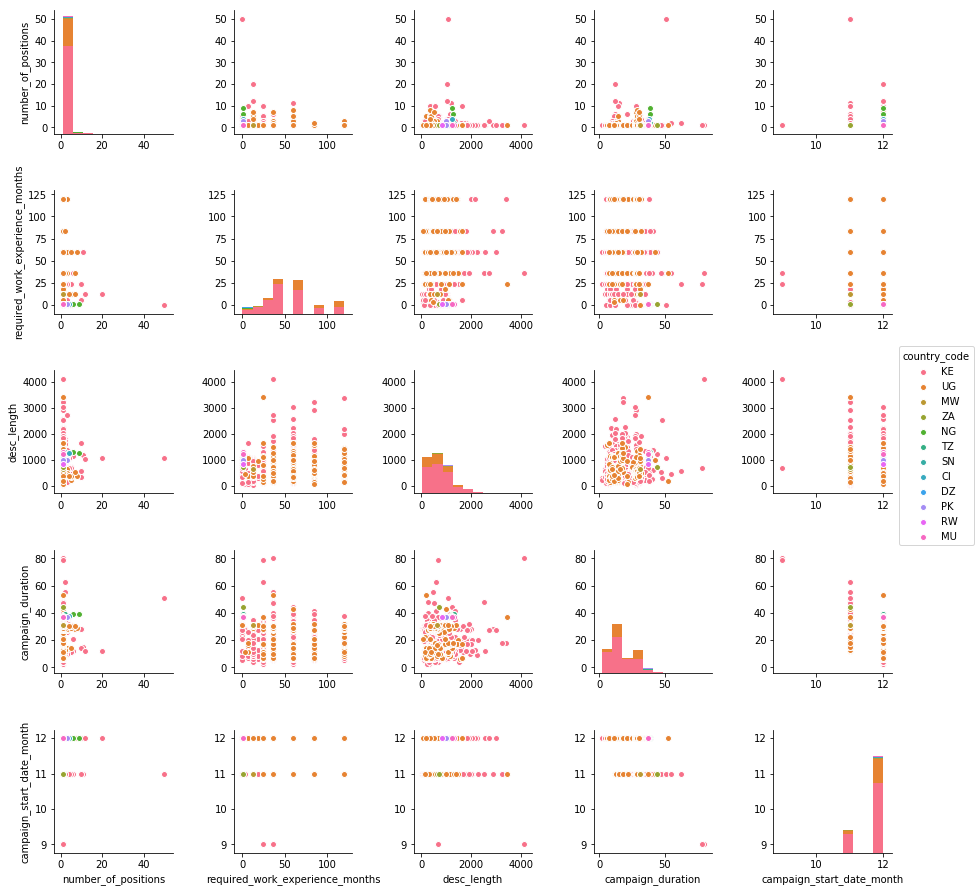

In [62]:
sns.pairplot(df[['number_of_positions','required_work_experience_months','desc_length','campaign_duration','campaign_start_date_month','job_level','country_code']],hue='country_code')

In [122]:
df = pd.get_dummies(df,prefix=['country_code','job_level'],columns=['country_code','job_level'],dummy_na=True)

In [123]:
df.drop(['campaign_end_date','campaign_end_date_year','campaign_end_date_month','campaign_end_date_dow','campaign_end_date_day'], axis=1,inplace=True)

In [124]:
df.location.value_counts()[:15]

Nairobi          451
Uganda           192
Tharaka Nithi     54
Kajiado           21
Kisii             14
Mombasa           14
Daadab            11
Kisumu             7
Nakuru             5
Kampala            5
Mandera            5
Lamu, Lamu         5
Kiambu             4
Pakistan           3
Kakamega           3
Name: location, dtype: int64

In [125]:
top_locations = ['Nairobi','Uganda','Tharaka Nithi','Kajiado','Kisii','Mombasa','Daadab','Kisumu']
for loc in top_locations:
    df['location_'+loc] = np.where(df.location==loc,1,0)
df['location_other'] = np.where(~df.location.isin(top_locations),1,0)

In [126]:
top_employers = df.employer_name.value_counts()[df.employer_name.value_counts() > 10].index

In [127]:
for emp in top_employers:
    df['employer_'+emp] = np.where(df.employer_name == emp ,1,0)
df['employer_other'] = np.where(~df.employer_name.isin(top_employers),1,0)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 65 columns):
campaign_start_date                                                       836 non-null datetime64[ns]
country                                                                   836 non-null object
description                                                               836 non-null object
employer_name                                                             836 non-null object
location                                                                  836 non-null object
number_of_positions                                                       836 non-null int64
required_work_experience_months                                           836 non-null int64
responsibilities                                                          834 non-null object
salary_max_cents                                                          836 non-null int64
salary_max_currency                         

In [129]:
df.to_csv('data/all_with_features.csv',header=True)

In [130]:
df.columns

Index([u'campaign_start_date', u'country', u'description', u'employer_name',
       u'location', u'number_of_positions', u'required_work_experience_months',
       u'responsibilities', u'salary_max_cents', u'salary_max_currency',
       u'salary_min_cents', u'salary_min_currency', u'styled_flow_url',
       u'title', u'url', u'campaign_start_date_year',
       u'campaign_start_date_month', u'campaign_start_date_day',
       u'campaign_start_date_dow', u'campaign_duration', u'desc_length',
       u'country_code_CI', u'country_code_DZ', u'country_code_KE',
       u'country_code_MU', u'country_code_MW', u'country_code_NG',
       u'country_code_PK', u'country_code_RW', u'country_code_SN',
       u'country_code_TZ', u'country_code_UG', u'country_code_ZA',
       u'country_code_nan', u'job_level_Entry-Level', u'job_level_Mid-Level',
       u'job_level_Senior', u'job_level_nan', u'location_Nairobi',
       u'location_Uganda', u'location_Tharaka Nithi', u'location_Kajiado',
       u'location_